# TECHNOCOLABS_MINORPROJECT:

# IMPORTING THE LIBRARIES:

In [38]:
import bz2
import json
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns 
import pickle

# 1.DATA COLLECTION

# IMPORTING THE DATSET

In [39]:
filename = 'RC_2015-01.bz2'

In [40]:
with bz2.open(filename, "rt") as bzinput:
    lines = []
    for i, line in enumerate(bzinput):
        if i == 200000:
            break
        reddit = json.loads(line)
        lines.append(reddit)

In [41]:
df = pd.DataFrame(lines)
df

,score_hidden,name,link_id,body,downs,created_utc,score,author,distinguished,id,...,parent_id,subreddit,author_flair_css_class,author_flair_text,gilded,retrieved_on,ups,controversiality,subreddit_id,edited
0,False,t1_cnas8zv,t3_2qyr1a,Most of us have some family members like this....,0,1420070400,14,YoungModern,None,cnas8zv,...,t3_2qyr1a,exmormon,None,None,0,1425124282,14,0,t5_2r0gj,False
1,False,t1_cnas8zw,t3_2qv6c6,But Mill's career was way better. Bentham is l...,0,1420070400,3,RedCoatsForever,None,cnas8zw,...,t1_cnas2b6,CanadaPolitics,on,Ontario,0,1425124282,3,0,t5_2s4gt,False
2,False,t1_cnas8zx,t3_2qxefp,"Mine uses a strait razor, and as much as i lov...",0,1420070400,1,vhisic,None,cnas8zx,...,t3_2qxefp,AdviceAnimals,None,None,0,1425124282,1,0,t5_2s7tt,False
3,False,t1_cnas8zy,t3_2qys4x,[deleted],0,1420070400,1,[deleted],None,cnas8zy,...,t3_2qys4x,AdviceAnimals,None,None,0,1425124282,1,0,t5_2s7tt,False
4,False,t1_cnas8zz,t3_2qm5bi,"Very fast, thank you!",0,1420070400,2,Mastersimpson,None,cnas8zz,...,t3_2qm5bi,freedonuts,None,None,0,1425124282,2,0,t5_2y51u,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,t1_cnawl5n,t3_2qons3,"*Nik bent a little, but laughed.* ""Relax... ju...",0,1420080960,1,TotalWarfare,None,cnawl5n,...,t1_cnawk9g,rwbyRP,,Wilhelm Jung | Nikolas Brunoz,0,1425122260,1,0,t5_32s5j,False
199996,False,t1_cnawl5o,t3_2qz61i,I want to get some lotion products from indie....,0,1420080960,2,Asiastana,None,cnawl5o,...,t3_2qz61i,Indiemakeupandmore,None,None,0,1425122260,2,0,t5_2w8pb,False
199997,False,t1_cnawl5p,t3_2qx40m,"Trust me, you are that whole new person. Good...",0,1420080960,4,Kashik,None,cnawl5p,...,t1_cnack45,progresspics,None,None,0,1425122260,4,0,t5_2sl0y,False
199998,False,t1_cnawl5q,t3_2qx0x0,[deleted],0,1420080960,1,[deleted],None,cnawl5q,...,t3_2qx0x0,Cooking,None,None,0,1425122260,1,0,t5_2qh7f,False


# 2.EXPLORATORY DATA ANALYSIS

# IDENTIFICATION OF DATATYPES

In [42]:
df.dtypes

score_hidden                bool
name                      object
link_id                   object
body                      object
downs                      int64
created_utc               object
score                      int64
author                    object
distinguished             object
id                        object
archived                    bool
parent_id                 object
subreddit                 object
author_flair_css_class    object
author_flair_text         object
gilded                     int64
retrieved_on               int64
ups                        int64
controversiality           int64
subreddit_id              object
edited                    object
dtype: object

# SHAPE OF THE DATASET

In [43]:
df.shape

(200000, 21)

In [44]:
df.columns

Index(['score_hidden', 'name', 'link_id', 'body', 'downs', 'created_utc',
       'score', 'author', 'distinguished', 'id', 'archived', 'parent_id',
       'subreddit', 'author_flair_css_class', 'author_flair_text', 'gilded',
       'retrieved_on', 'ups', 'controversiality', 'subreddit_id', 'edited'],
      dtype='object')

# STATICAL SUMMARY OF NUMERICAL VARIABLES:

In [45]:
df.describe()

,downs,score,gilded,retrieved_on,ups,controversiality
count,200000.0,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.0
mean,0.0,4.336950,0.000770,1.425123e+09,4.336950,0.0
std,0.0,32.059644,0.029145,5.837471e+02,32.059644,0.0
min,0.0,-302.000000,0.000000,1.425122e+09,-302.000000,0.0
25%,0.0,1.000000,0.000000,1.425123e+09,1.000000,0.0
50%,0.0,1.000000,0.000000,1.425123e+09,1.000000,0.0
75%,0.0,3.000000,0.000000,1.425124e+09,3.000000,0.0
max,0.0,3967.000000,2.000000,1.425124e+09,3967.000000,0.0


# FINDING NULL VALUES

In [46]:
df.isnull().sum()

score_hidden                   0
name                           0
link_id                        0
body                           0
downs                          0
created_utc                    0
score                          0
author                         0
distinguished             198591
id                             0
archived                       0
parent_id                      0
subreddit                      0
author_flair_css_class    126193
author_flair_text         125705
gilded                         0
retrieved_on                   0
ups                            0
controversiality               0
subreddit_id                   0
edited                         0
dtype: int64

# GRAPHICAL UNIVARIATE ANALYSIS

<AxesSubplot:>

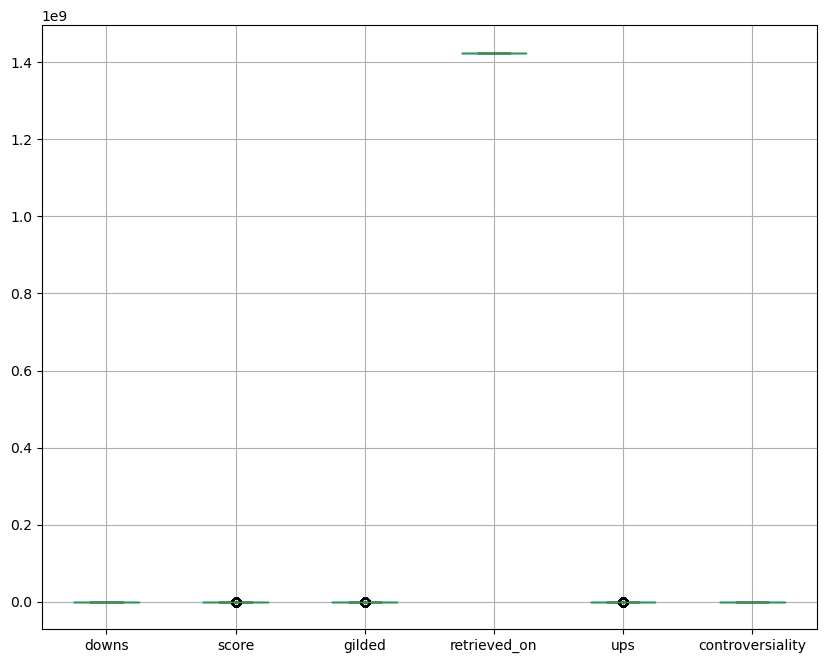

In [47]:
df.boxplot( column =['downs','score','gilded','retrieved_on','ups','controversiality']) 

In [48]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'downs'}>,
        <AxesSubplot:title={'center':'score'}>],
       [<AxesSubplot:title={'center':'gilded'}>,
        <AxesSubplot:title={'center':'retrieved_on'}>],
       [<AxesSubplot:title={'center':'ups'}>,
        <AxesSubplot:title={'center':'controversiality'}>]], dtype=object)

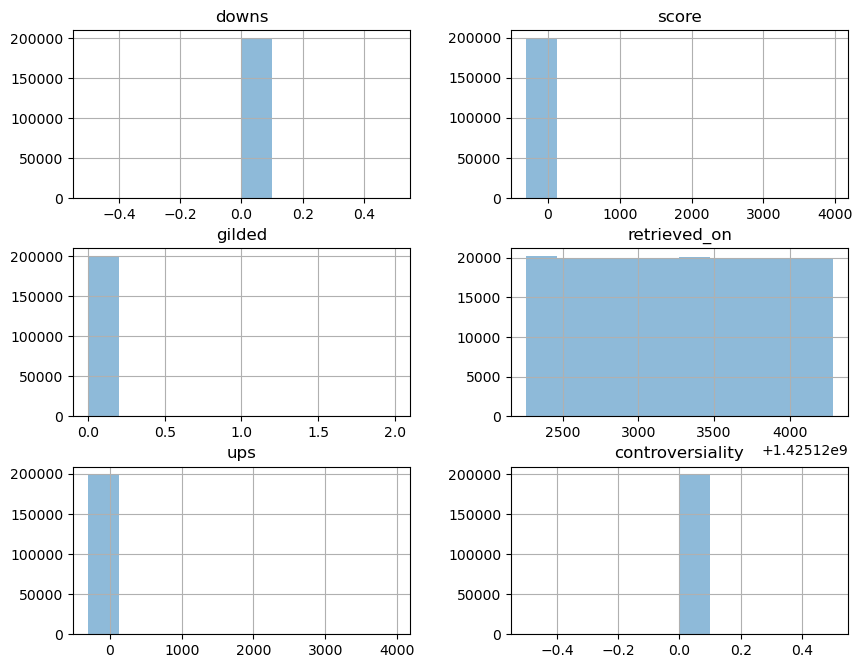

In [49]:
frames =['downs','score','gilded','retrieved_on','ups','controversiality']
df[frames].hist(bins=10,alpha=0.5)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


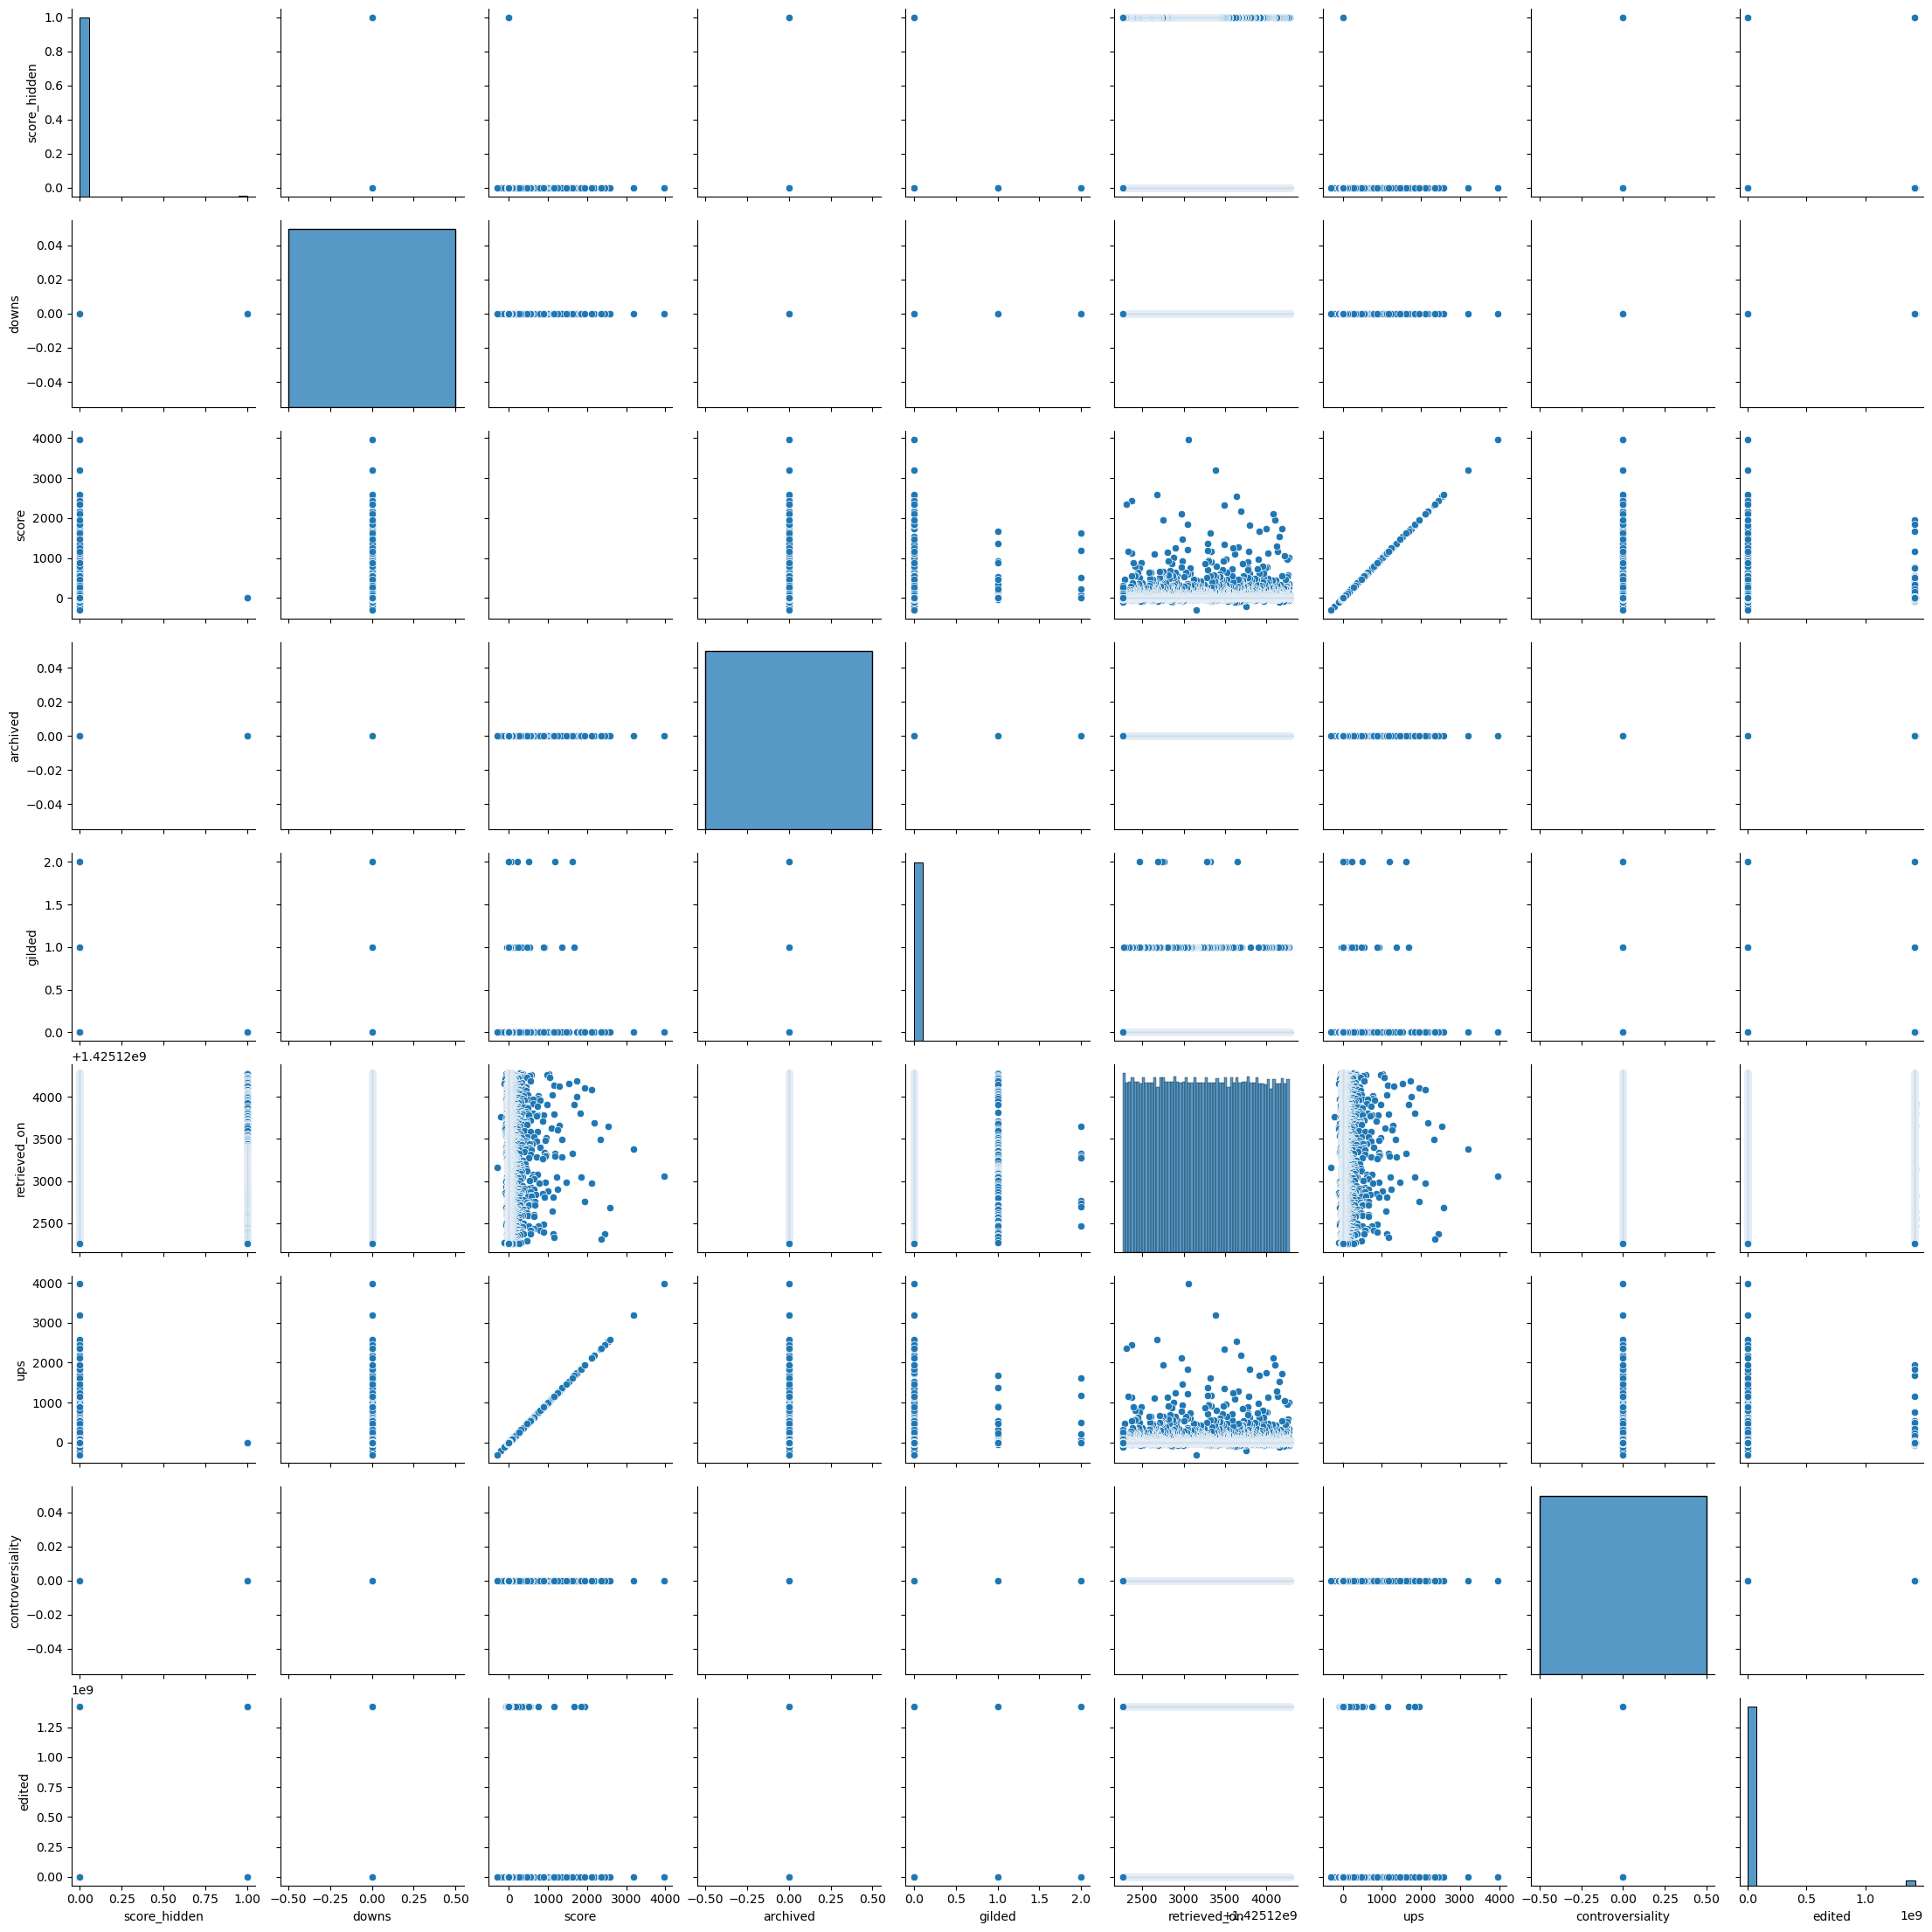

In [50]:
import seaborn as sns
sns.pairplot(df)

# 

# 3. DATA CLEANING

# HANDLING MISSING VALUES 

# PERCENTAGE OF MISSING VALUES:

In [51]:
percentage=(df.isnull().sum().sum()/(200000*21))*100

In [52]:
print(percentage)

10.725928571428572


# FILLING MISSING COLUMNS

In [53]:
df = df.fillna(df.mode().iloc[0])

In [54]:
df.isnull().sum()

score_hidden              0
name                      0
link_id                   0
body                      0
downs                     0
created_utc               0
score                     0
author                    0
distinguished             0
id                        0
archived                  0
parent_id                 0
subreddit                 0
author_flair_css_class    0
author_flair_text         0
gilded                    0
retrieved_on              0
ups                       0
controversiality          0
subreddit_id              0
edited                    0
dtype: int64

# DROPPING USELESS COLUMNS:

In [55]:
df=df.drop(['subreddit','author_flair_css_class','author_flair_text','name','id','ups','distinguished','created_utc','retrieved_on'],axis=1)
df.shape

(200000, 12)

# APPLYING SENTIMENT ANALYSIS:

In [56]:
df=df[df['body']!="[deleted]"]
df['body'].value_counts()
df['body']

0         Most of us have some family members like this....
1         But Mill's career was way better. Bentham is l...
2         Mine uses a strait razor, and as much as i lov...
4                                     Very fast, thank you!
5         The guy is a professional, and very good at wh...
                                ...                        
199994    I was talking to this cute guy all night and I...
199995    *Nik bent a little, but laughed.* "Relax... ju...
199996    I want to get some lotion products from indie....
199997    Trust me, you are that whole new person.  Good...
199999    I'm late to the game here, but I went out with...
Name: body, Length: 187229, dtype: object

In [57]:
from nltk.corpus import stopwords
all_stopwords=stopwords.words('English')
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
from nltk.tokenize import word_tokenize
from nltk.stem import  WordNetLemmatizer
lem=WordNetLemmatizer()
punc =['(',')',';',',','?','@','#','%','^','&','*','.','+','=','"','"','!','//','/','http','[',']',]
body_new= []
for i in range(df.shape[0]):
    row = df['body'].values[i]
    words_tokenized = word_tokenize(row)
    list_of_words= ''
    for word in words_tokenized:
        word = word.lower()
        if not word in all_stopwords and not word in punc:
            list_of_words+=lem.lemmatize(word) + ' '
    body_new.append(list_of_words)
body_new

['u family member like family like ',
 "mill 's career way better bentham like joseph smith mill 's brigham young ",
 'mine us strait razor much love clipper love razor much follows warm towel think might go get hair cut week ',
 'fast thank ',
 'guy professional good highly doubt miss often ',
 "great question want thank asking however n't answer 'm interested learning ",
 'ie-shiv-ghostblade-zerks-lw-bt still main graf build 60 crit think massive attack speed decent ad plus pen ',
 ': ',
 "n't know describe gently pinched two spot weiner length apart twisted 3or 4 time ",
 'say g ',
 '/r/im14andthisisfunny ',
 'love music ',
 'mean village hidden filler complaint right ',
 'always forget bold mobile ',
 'enjoy deep 100 hour rpgs definitely worth money ',
 'haha awesome man got grandpa christmas well ',
 "completely agree 've spent long staring sober .. ",
 "gt gt woman want give child adoption named father unable without father 's consent gt easy enough simply n't name father woman f

In [59]:
df=df.drop('body',axis=1)
df['body']=body_new
df

,score_hidden,link_id,downs,score,author,archived,parent_id,gilded,controversiality,subreddit_id,edited,body
0,False,t3_2qyr1a,0,14,YoungModern,False,t3_2qyr1a,0,0,t5_2r0gj,False,u family member like family like
1,False,t3_2qv6c6,0,3,RedCoatsForever,False,t1_cnas2b6,0,0,t5_2s4gt,False,mill 's career way better bentham like joseph ...
2,False,t3_2qxefp,0,1,vhisic,False,t3_2qxefp,0,0,t5_2s7tt,False,mine us strait razor much love clipper love ra...
4,False,t3_2qm5bi,0,2,Mastersimpson,False,t3_2qm5bi,0,0,t5_2y51u,False,fast thank
5,False,t3_2qxe1p,0,6,BigGupp1,False,t1_cnaqg2t,0,0,t5_2qh61,False,guy professional good highly doubt miss often
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,t3_2qz58u,0,1,rainaeatscantaloupe,False,t1_cnaw9qf,0,0,t5_323oy,False,talking cute guy night told would never lose s...
199995,False,t3_2qons3,0,1,TotalWarfare,False,t1_cnawk9g,0,0,t5_32s5j,False,nik bent little laughed `` relax ... relax tak...
199996,False,t3_2qz61i,0,2,Asiastana,False,t3_2qz61i,0,0,t5_2w8pb,False,want get lotion product indie 'm set eyeshadow...
199997,False,t3_2qx40m,0,4,Kashik,False,t1_cnack45,0,0,t5_2sl0y,False,trust whole new person good luck new


In [60]:
from afinn import Afinn
afinn = Afinn()
body_new =[]
for row in range(df.shape[0]):
    sentence = df['body'].values[row]
    body_new.append(afinn.score(sentence))
body_new

[4.0,
 4.0,
 6.0,
 2.0,
 0.0,
 8.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 -2.0,
 1.0,
 4.0,
 7.0,
 1.0,
 4.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -5.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 2.0,
 -4.0,
 3.0,
 -1.0,
 -8.0,
 1.0,
 2.0,
 3.0,
 7.0,
 3.0,
 0.0,
 -1.0,
 3.0,
 -5.0,
 12.0,
 0.0,
 2.0,
 -2.0,
 2.0,
 -5.0,
 1.0,
 0.0,
 -3.0,
 9.0,
 -5.0,
 -1.0,
 2.0,
 0.0,
 2.0,
 1.0,
 4.0,
 7.0,
 -4.0,
 2.0,
 2.0,
 -4.0,
 7.0,
 0.0,
 0.0,
 4.0,
 -5.0,
 1.0,
 0.0,
 0.0,
 3.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 3.0,
 0.0,
 4.0,
 6.0,
 3.0,
 6.0,
 2.0,
 -6.0,
 12.0,
 -5.0,
 3.0,
 0.0,
 4.0,
 2.0,
 0.0,
 -3.0,
 -1.0,
 -2.0,
 0.0,
 10.0,
 0.0,
 0.0,
 2.0,
 -9.0,
 3.0,
 2.0,
 1.0,
 0.0,
 -3.0,
 4.0,
 0.0,
 -3.0,
 0.0,
 -3.0,
 0.0,
 1.0,
 0.0,
 -2.0,
 5.0,
 -6.0,
 1.0,
 -4.0,
 2.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 3.0,
 2.0,
 2.0,
 2.0,
 9.0,
 -3.0,
 2.0,
 3.0,
 0.0,
 3.0,
 8.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 3.0,
 2.0,
 -5.0,
 1.0,
 12.0,
 8.0,
 3.0,
 -2.0,
 -7.0,
 -1.0,
 1.0,


In [61]:
df = df.drop('body',axis=1)
df['body']=body_new
df

,score_hidden,link_id,downs,score,author,archived,parent_id,gilded,controversiality,subreddit_id,edited,body
0,False,t3_2qyr1a,0,14,YoungModern,False,t3_2qyr1a,0,0,t5_2r0gj,False,4.0
1,False,t3_2qv6c6,0,3,RedCoatsForever,False,t1_cnas2b6,0,0,t5_2s4gt,False,4.0
2,False,t3_2qxefp,0,1,vhisic,False,t3_2qxefp,0,0,t5_2s7tt,False,6.0
4,False,t3_2qm5bi,0,2,Mastersimpson,False,t3_2qm5bi,0,0,t5_2y51u,False,2.0
5,False,t3_2qxe1p,0,6,BigGupp1,False,t1_cnaqg2t,0,0,t5_2qh61,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,t3_2qz58u,0,1,rainaeatscantaloupe,False,t1_cnaw9qf,0,0,t5_323oy,False,2.0
199995,False,t3_2qons3,0,1,TotalWarfare,False,t1_cnawk9g,0,0,t5_32s5j,False,1.0
199996,False,t3_2qz61i,0,2,Asiastana,False,t3_2qz61i,0,0,t5_2w8pb,False,-1.0
199997,False,t3_2qx40m,0,4,Kashik,False,t1_cnack45,0,0,t5_2sl0y,False,7.0


# DEALING WITH CATEGORICAL COLUMNS : 

In [62]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
column =['link_id','author','parent_id','subreddit_id','edited']
for col in column:
    df[col]= label_encoder.fit_transform(df[col])
df

,score_hidden,link_id,downs,score,author,archived,parent_id,gilded,controversiality,subreddit_id,edited,body
0,False,32385,0,14,44109,False,115323,0,0,1187,0,4.0
1,False,8837,0,3,32097,False,42869,0,0,2263,0,4.0
2,False,17720,0,1,83272,False,104091,0,0,2407,0,6.0
4,False,3150,0,2,24532,False,97257,0,0,5102,0,2.0
5,False,17623,0,6,4732,False,32925,0,0,106,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,41532,0,1,73958,False,94224,0,0,5774,0,2.0
199995,False,3763,0,1,40823,False,95837,0,0,5905,0,1.0
199996,False,41881,0,2,3156,False,124731,0,0,4667,0,-1.0
199997,False,15497,0,4,20862,False,8317,0,0,2935,0,7.0


# SELECTING A MODEL:

In [63]:
y =df['score']

In [64]:
X = df.drop('score',axis=1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.tree import DecisionTreeRegressor
df_model = DecisionTreeRegressor(random_state=0)
df_model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error
predicted = df_model.predict(X_test)
predicted = predicted.astype(int)   
print(predicted)
mean_error = mean_absolute_error(y_test, predicted)
print("MEAN_ABSOLUTE_ERROR: ")
print(mean_error)

[5 1 9 ... 3 1 2]
MEAN_ABSOLUTE_ERROR: 
6.112053495129038
